## DNA sequencing
### HW 1 Question 1

In [1]:
subsequences = ['CAT' , 'ATT' , 'ATG', 'TAT' , 'TTG', 'TGC', 'TGT' , 'GTA']

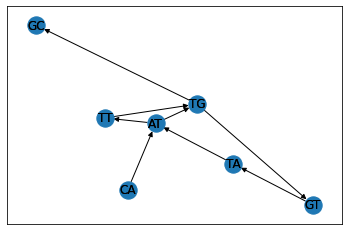

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    for i in sub:
        subseq1=i[0:2]
        subseq2=i[1:3]
        G.add_node(subseq1)
        G.add_node(subseq2)
    for (i,j) in combinations(G.nodes(),2):
        subseq1=str(i)
        subseq2=str(j)
        subseq=subseq1[0:2]+subseq2[1]  # string operations between say "CA"+"T" -> "CAT"
        if subseq1[1]==subseq2[0] and subseq in sub:
            G.add_edge(i,j)
        subseq=subseq2[0:2]+subseq1[1]
        if subseq2[1]==subseq1[0] and subseq in sub:
            G.add_edge(j,i)
    return G

G = construct_graph_from(subsequences) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)

In [3]:
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.in_degree(i)>G.out_degree(i):
        stop=i

G.add_edge(stop, start)
cycle=list(nx.eulerian_circuit(G, start))
print(cycle)
DNA=[cycle[0][0]]
for i in range(1,len(cycle)):
    DNA.append(str(cycle[i][0][1]))
print(''.join(DNA))

[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]
CATTGTATGC
